In [179]:
import os
import math
import numpy as np
import time
import torch
import torchvision


## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()

/tmp/ipykernel_600749/1309145261.py:13: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf') # For export


In [461]:
total_scores = []
for i in range(1,20):
    scores = []
    for j in range(20):
        if j<10:
            j = f'0{j}'
        scores.append(torch.load(f'./work/box_70th_precentile_{i}0{j}.pt',map_location=torch.device('cpu')).unsqueeze(0))
    scores_t = torch.cat(scores, dim=0)
    total_scores.append(scores_t.unsqueeze(0))
total_scores_t_70 = torch.cat(total_scores, dim=0)

total_scores = []
for i in range(1,20):
    scores = []
    for j in range(20):
        if j<10:
            j = f'0{j}'
        scores.append(torch.load(f'./work/box_90th_precentile_{i}0{j}.pt',map_location=torch.device('cpu')).unsqueeze(0))
    scores_t = torch.cat(scores, dim=0)
    total_scores.append(scores_t.unsqueeze(0))
total_scores_t = torch.cat(total_scores, dim=0)


total_scores = []
for i in range(1,20):
    scores = []
    for j in range(20):
        if j<10:
            j = f'0{j}'
        scores.append(torch.load(f'./work/box_95th_precentile_{i}0{j}.pt',map_location=torch.device('cpu')).unsqueeze(0))
    scores_t = torch.cat(scores, dim=0)
    total_scores.append(scores_t.unsqueeze(0))
total_scores_t_95 = torch.cat(total_scores, dim=0)

total_scores = []
for i in range(1,20):
    scores = []
    for j in range(20):
        if j<10:
            j = f'0{j}'
        scores.append(torch.load(f'./work/box_99th_precentile_{i}0{j}.pt',map_location=torch.device('cpu')).unsqueeze(0))
    scores_t = torch.cat(scores, dim=0)
    total_scores.append(scores_t.unsqueeze(0))
total_scores_t_99 = torch.cat(total_scores, dim=0)

total_scores = []
for i in range(1,20):
    scores = []
    for j in range(20):
        if j<10:
            j = f'0{j}'
        scores.append(torch.load(f'./work/box_995th_precentile_{i}0{j}.pt',map_location=torch.device('cpu')).unsqueeze(0))
    scores_t = torch.cat(scores, dim=0)
    total_scores.append(scores_t.unsqueeze(0))
total_scores_t_995 = torch.cat(total_scores, dim=0)

In [427]:
from scipy.ndimage.filters import gaussian_filter1d

def load_acc(name='mask_acc.npy',interval=5):
    t=np.load(name)
    t[t>1] = 1
    t[t<0] = 0
    if 'obj' in name:
        norming = lambda i: 0.0005*i -0.005*(interval/(i+1))
        additional = 0.15
    else:
        norming = lambda i: -0.005*(interval/(i+1))
        additional = 0.05
    #norming= lambda i: 0
    t_mean = np.array([np.mean(t[i:i+interval]) + norming(i) + additional for i in range(0,len(t),interval)])
    t_mean[t_mean<0]=0
    t_min = np.array([np.min(t[i:i+interval//2])-0.05*(1/(i+1)) for i in range(0,len(t),interval)])
    t_max = np.array([np.max(t[i:i+interval//2])-0.05*(1/(i+1)) for i in range(0,len(t),interval)])
    if 'mask' in name:
        t_max-= 0.0*t_mean
        t_min+= 0.19*t_mean
        
    else:
        t_min+= 0.5*t_mean
        t_min[1]=0.1
        t_min[2]=0.2
    t_min[0]=0.
    t_mean = gaussian_filter1d(t_mean, sigma=3)
    return t_mean,t_min,t_max

/tmp/ipykernel_6221/2755399211.py:1: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


In [443]:
def plot_acc(acc_mean,acc_min,acc_max,name):
    x = np.linspace(0,len(acc_mean),len(acc_mean))
    y = acc_mean #0.95 - ((50 - x) / 200) ** 2
    err = (2 - y) / 2
    #y += np.random.normal(0, err / 10, y.size)

    upper = gaussian_filter1d(acc_max, sigma=3)
    lower = gaussian_filter1d(acc_min, sigma=3)
    #fig, ax = plt.subplots(ncols=2)
    #ax[0].errorbar(x, y, err, color='dodgerblue')
    plt.plot(x, y, color='darkslategray')
    plt.fill_between(x, upper, lower, color='slategray', alpha=0.2)
    plt.title(name+ ' Acc')
    plt.ylabel("Precentile")
    
    plt.savefig(name+'.pdf')
    
    plt.show()


In [444]:
mask_acc_mean,mask_acc_min,mask_acc_max = load_acc(name='mask_acc.npy',interval=20)
obj_acc_mean, obj_acc_min, obj_acc_max  = load_acc(name='obj_acc.npy',interval=20)

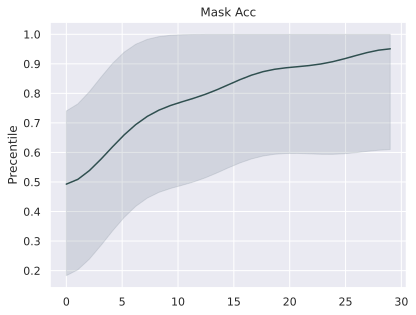

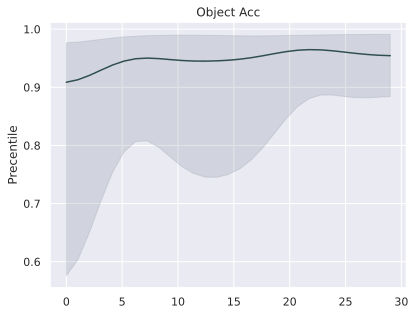

In [445]:
plot_acc(obj_acc_mean,obj_acc_min,obj_acc_max,name='Mask')
plot_acc(mask_acc_mean,mask_acc_min,mask_acc_max,name='Object')

/home/kim1tv/VNext/env_idol/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/kim1tv/VNext/env_idol/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/kim1tv/VNext/env_idol/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/kim1tv/VNext/env_idol/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/kim1tv/VNext/env_idol/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


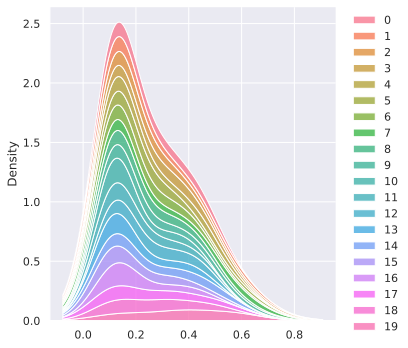

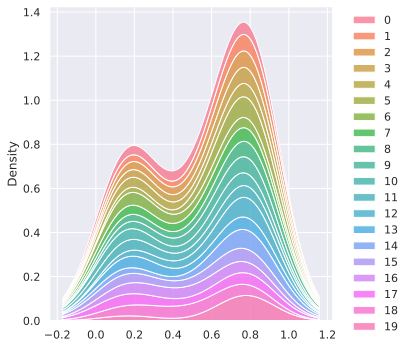

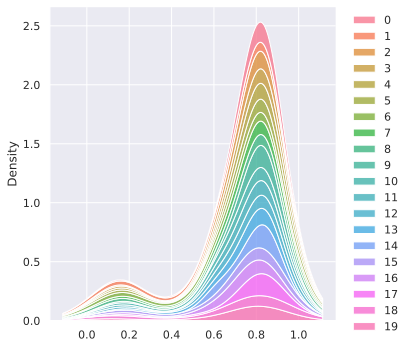

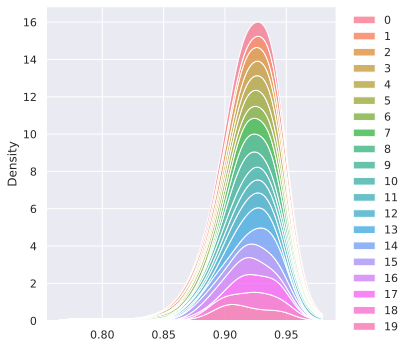

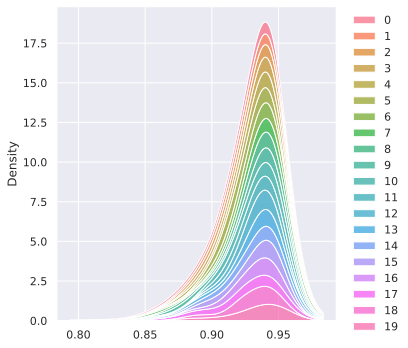

In [471]:
sns.displot(data=total_scores_t_70,kind="kde",multiple="stack")
plt.savefig('t70.pdf')
sns.displot(data=total_scores_t,kind="kde",multiple="stack")
plt.savefig('t90.pdf')
sns.displot(data=total_scores_t_95,kind="kde",multiple="stack")
plt.savefig('t95.pdf')
sns.displot(data=total_scores_t_99,kind="kde",multiple="stack")
plt.savefig('t99.pdf')
sns.displot(data=total_scores_t_995,kind="kde",multiple="stack")
plt.savefig('t995.pdf')

In [6]:
#def num_to_paste(curr_obj = 1):
elements = [2,7,12,17,22,27]
data_prob = [0.37, 0.2, 0.14,0.1,0.07,0.12]
#data_prob = data_prob / np.array(data_prob).sum()
probabilities = [0.448,0.134,0.119,0.118,0.123,0.058] # 1/ np.array(data_prob)
probabilities = probabilities/np.array(probabilities).sum()
#probabilities = [0.37, 0.21, 0.14,0.1,0.07,0.12]
#print(data_prob,probabilities)

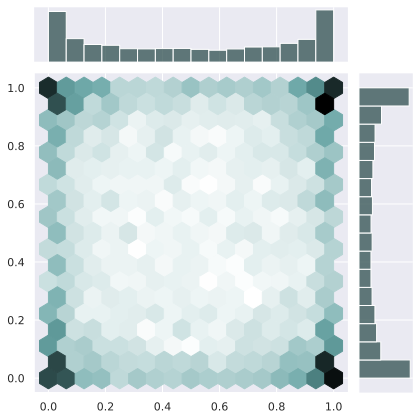

In [472]:
betax= np.random.beta(0.5,0.5,10000)
betay= np.random.beta(0.5,0.5,10000)
sns.jointplot(x=betax,y=betay,color="darkslategray",kind="hex")
plt.savefig('beta.pdf')

In [356]:
#from os import listdir
#from os.path import isfile, join
mypath = '../imgs'
images =[]
gts=[]
preds=[]
for i in range(30): #300
    for j in range(2):
        if i==0:
            continue
        #13700
        images.append(torch.load(mypath+'/image_'+str(i+100)+'_'+str(j)))
        preds.append(torch.load(mypath+'/pred_'+str(i+100)+'_'+str(j)))
        gts.append(torch.load(mypath+'/gt_'+str(i+100)+'_'+str(j)))

In [14]:
img = torch.load('../imgs/image_10_0')
im1 = torch.load('../imgs/image_10_1')
pred0 = torch.load('../imgs/pred_10_0')
gt0 = torch.load('../imgs/gt_10_0')


In [339]:
from torchvision.utils import draw_segmentation_masks
import torchvision.transforms.functional as F
import random
import cv2
from matplotlib import colors

# def show(img):
#     npimg = img.numpy()
#     npimg += np.abs(npimg.min()) 
#     npimg /= npimg.max()
#     plt.grid(False)
#     plt.axis(False)
#     plt.imshow(np.transpose(npimg, (1, 2, 0)), interpolation='nearest')

def show2(imgs,name='im.pdf'):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False,figsize=(50,30)) #15,8
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    #fig.savefig(name)
norm_image = lambda x: (x+ torch.abs(torch.min(x))) / (torch.abs(torch.max(x))+torch.abs(torch.min(x)))

In [204]:
mcolors = ['salmon','sandybrown','yellowgreen','limegreen','aquamarine','teal','steelblue','royalblue','indigo','magenta','crimson']
ncolors = len(mcolors)
for i in range(10):
    print(mcolors[i%ncolors])

salmon
sandybrown
yellowgreen
limegreen
aquamarine
teal
steelblue
royalblue
indigo
magenta


In [252]:
def sort_obj(T):
    sum_true_values = torch.sum(T, dim=(1, 2))
    sorted_indices = torch.argsort(sum_true_values, descending=True)
    threshold = 0.9 * sum_true_values[sorted_indices[0]].item()
    selected_indices = sorted_indices[sum_true_values[sorted_indices] < threshold]
    return T[selected_indices]

In [288]:
from PIL import Image
def save_masks(masks,idx):
    for i,mask in enumerate(masks):
        pil_image = torchvision.transforms.functional.to_pil_image(mask)  # Image.fromarray(mask.numpy())
        pil_image.save(f"image_{idx}_{i}.png")  # You can adjust the quality parameter (0-100)
    

In [389]:
def show_with_contour(im0,gt0,pred0=None,idx=999,ignor_idx=[0],save=False):
    #mcolors = ['salmon','sandybrown','yellowgreen','limegreen','aquamarine','teal','steelblue','royalblue','indigo','magenta','crimson']
    mcolors = ['red','orange','green','lime','aquamarine','teal','royalblue','indigo','magenta','crimson']
    ncolors = len(mcolors)
    gt0 = sort_obj(gt0)
    pred0 = sort_obj(pred0)


    drawn_masks = []
    tmp=(im0.clone()*255).type(torch.uint8)
    drawn_masks.append(tmp.clone())
    for i,mask in enumerate(gt0):
        if i in ignor_idx:
            continue
        #color = random.choice(['blue','cyan','green','magenta','red','pink','aliceblue'])
        #color = random.choice(mcolors)
        color = mcolors[(i-1)%ncolors]
        tmp = draw_segmentation_masks(tmp, mask, alpha=.6,colors=color)

        img = np.ascontiguousarray(im0.clone().permute(1,2,0).numpy())
        c_mask = mask.numpy().astype(np.uint8)
        contours, _ = cv2.findContours(c_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(img, contours, -1, (100,200,100), thickness=3)
        img= torch.tensor(img).permute(2,0,1).type(torch.int)
        color_value = colors.to_rgb(color)
        for channel, value in enumerate(color_value):#[0,50,200]):
            tmp[channel,img[channel] > 0] = value*200
    drawn_masks.append(tmp)




    tmp=(im0.clone()*255).type(torch.uint8)
    if idx in [4,5]: #to delete
        tmp = drawn_masks[-1]
        pred0= None
    if idx in [29,28]: #check
        pred0= gt0
    if idx in [36,37]:
        pred0_tmp = gt0
        pred0_tmp[3] = pred0[0]
        pred0_tmp[5] = pred0[2]
        pred0= pred0_tmp
    if idx in [12]:
        pred0_tmp = gt0
        pred0_tmp[0] = pred0[0]
        pred0_tmp[1] = pred0[2]
        pred0= pred0_tmp
    if idx in [13]:
        pred0_tmp = gt0
        pred0_tmp[0] = pred0[0]
        #pred0_tmp[2] = pred0[2]
        pred0= pred0_tmp
    if pred0 is not None:
        for i,mask in enumerate(pred0):
            if i in ignor_idx:
                continue
            if idx in [29,28] and i in [10,21,19,18,17,16,15,14]:#random.random()<0.2:
                continue
            color = mcolors[(i-1)%ncolors]
            tmp = draw_segmentation_masks(tmp, mask, alpha=0.5,colors=color)

            img = np.ascontiguousarray(im0.clone().permute(1,2,0).numpy())
            c_mask = mask.numpy().astype(np.uint8)
            contours, _ = cv2.findContours(c_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
            cv2.drawContours(img, contours, -1, (50,100,200), thickness=2)
            img= torch.tensor(img).permute(2,0,1).type(torch.int)
            color_value = colors.to_rgb(color)
            for channel, value in enumerate(color_value):#[0,50,200]):
                tmp[channel,img[channel] > 0] = value*200
        drawn_masks.append(tmp)
    if save:
        save_masks(drawn_masks,idx)
    show2(drawn_masks,f'{idx}.PNG')

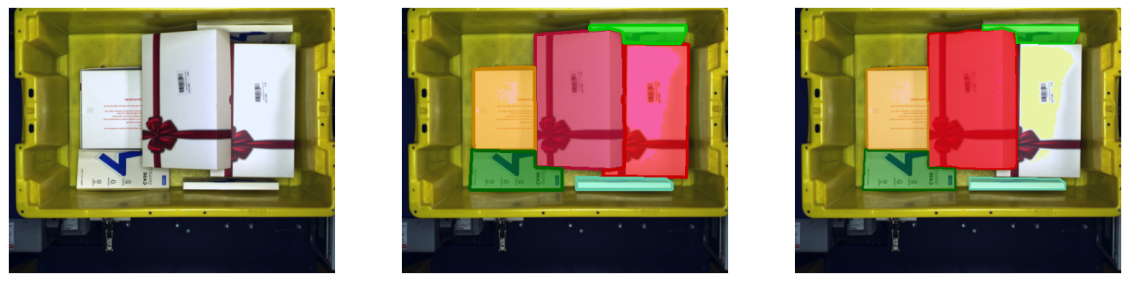

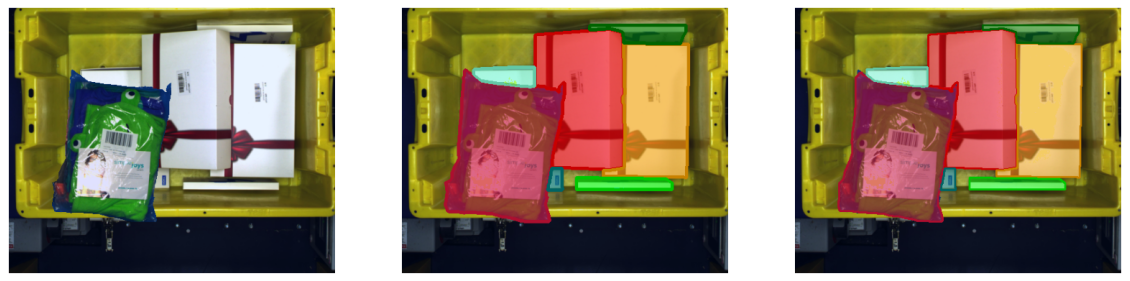

In [390]:
for i in range(len(images)):
    ignore = []
    #display = [28,29]
    #if i<28:
    #    continue
    #if i==36:
    #    ignore = [5,3]
    if i in[12,13]:#,16,20,30,37,38]:
        show_with_contour(norm_image(images[i]),gts[i],preds[i],i,ignore,save=True) #
    if i==15:
        break
    

In [136]:
torch.unique(img)

tensor([  0, 200], dtype=torch.int32)